In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\PYTHON\\datasets\\Predict loan approval\\train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [139]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [4]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [5]:
df['Gender'].mode()

0    Male
dtype: object

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender']=df['Gender'].fillna('Male')
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Dependents'].mode()

0    0
dtype: object

In [9]:
df['Dependents']=df['Dependents'].fillna(0)
df['Married']=df['Married'].fillna('Yes')

In [10]:
df['Self_Employed'].mode()

0    No
dtype: object

In [11]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [12]:
df['LoanAmount'].mean()

146.41216216216216

In [13]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [14]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [15]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [16]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [17]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
data=df.drop('Loan_ID',axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encode=LabelEncoder()

In [23]:
data['Gender']=encode.fit_transform(data['Gender'])
data['Married']=encode.fit_transform(data['Married'])
data['Self_Employed']=encode.fit_transform(data['Self_Employed'])
data['Education']=encode.fit_transform(data['Education'])
data['Property_Area']=encode.fit_transform(data['Property_Area'])
data['Loan_Status']=encode.fit_transform(data['Loan_Status'])

In [24]:
data.loc[data['Dependents']=='3+', 'Dependents']=3

In [25]:
data['Dependents'].unique()

array(['0', '1', '2', 3, 0], dtype=object)

In [26]:
data['Dependents']=[int(x) for x in data['Dependents']] 

In [27]:
data['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


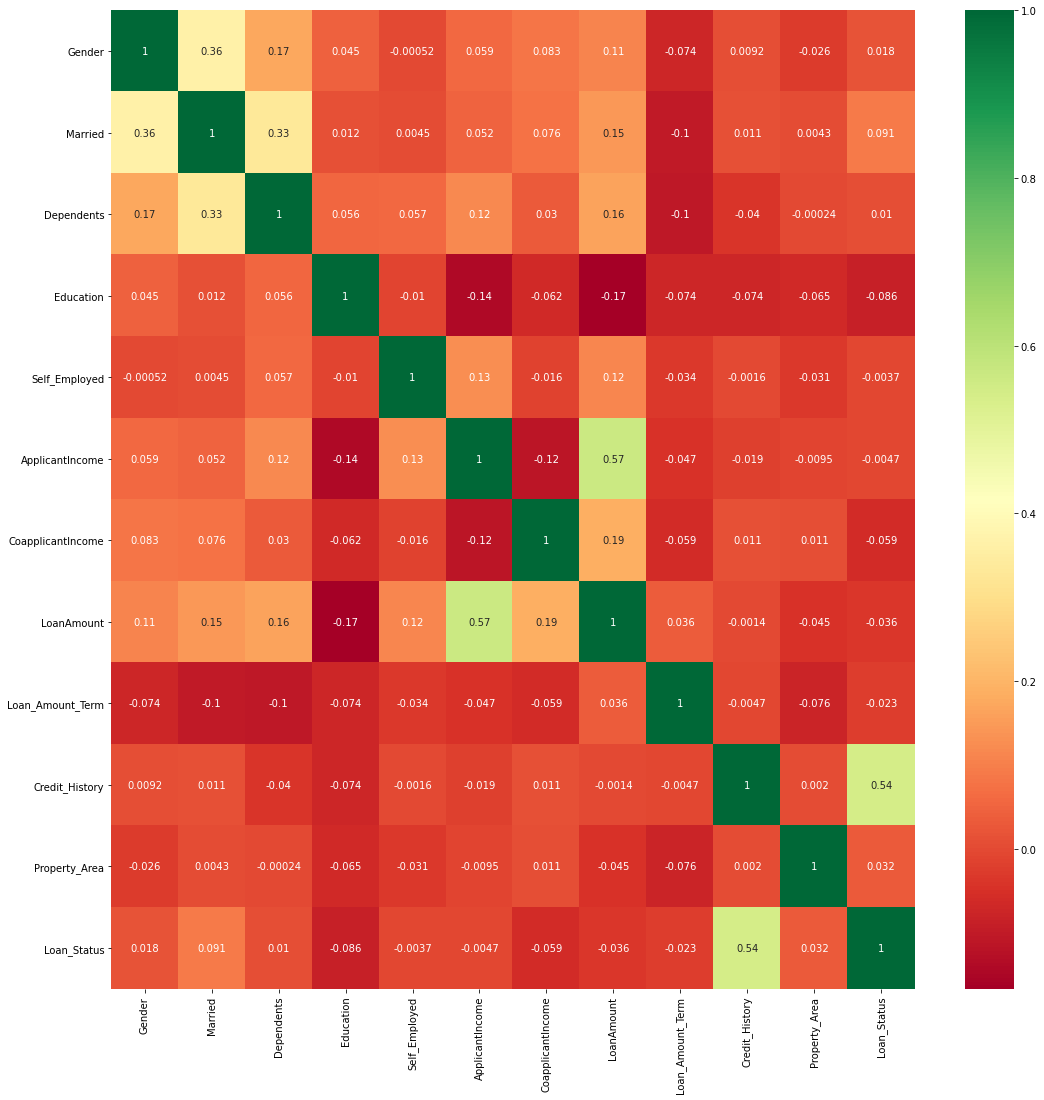

In [29]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
rdm=RandomForestClassifier()

In [32]:
x=data.drop('Loan_Status',axis=1)

In [33]:
y=data['Loan_Status']

In [34]:
rdm.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
score=cross_val_score(rdm,x,y,cv=10)

In [37]:
score.mean()

0.7835801163405606

In [38]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,None],
              'n_estimators':[100,200],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, x, y)




In [39]:
rf_ht_score

0.8078526096428909

In [40]:
rf_parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [41]:
rdm1=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth= 3,max_features= 2,min_samples_leaf= 2,n_estimators=100)

In [42]:
rdm1.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
score1=cross_val_score(rdm1,x,y,cv=10)

In [44]:
score1.mean()

0.8079323109465891

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=.2)

In [46]:
rdm1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred=rdm1.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score2=accuracy_score(y_test,y_pred)

In [50]:
score2

0.8048780487804879

# Deep learning approach

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [117]:
classifier=Sequential()

In [118]:
classifier.add(Dense(units=8,init='he_uniform',activation='relu',input_dim=11))

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", input_dim=11, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [119]:
classifier.add(Dropout(0.3))

In [120]:
classifier.add(Dense(units=6,init='he_uniform',activation='relu'))

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [121]:
classifier.add(Dropout(0.3))

In [122]:
classifier.add(Dense(units=6,init='he_uniform',activation='relu'))

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [123]:
classifier.add(Dropout(0.3))

In [124]:
classifier.add(Dense(output_dim=1,init='glorot_uniform',activation='sigmoid'))

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


In [125]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [128]:
model_history=classifier.fit(x_train,y_train,validation_split=0.2,batch_size=10,nb_epoch=20)

Train on 392 samples, validate on 99 samples
Epoch 1/20
392/392 [==============================] - 0s 304us/step - loss: 81.9217 - accuracy: 0.6071 - val_loss: 0.7846 - val_accuracy: 0.2929
Epoch 2/20
180/392 [============>.................] - ETA: 0s - loss: 25.6792 - accuracy: 0.6056

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


392/392 [==============================] - 0s 362us/step - loss: 43.9617 - accuracy: 0.5689 - val_loss: 0.5779 - val_accuracy: 0.7475
Epoch 3/20
392/392 [==============================] - 0s 320us/step - loss: 30.4096 - accuracy: 0.5867 - val_loss: 1.1992 - val_accuracy: 0.2525
Epoch 4/20
392/392 [==============================] - 0s 312us/step - loss: 25.6768 - accuracy: 0.5128 - val_loss: 0.6583 - val_accuracy: 0.6667
Epoch 5/20
392/392 [==============================] - 0s 358us/step - loss: 25.8002 - accuracy: 0.5179 - val_loss: 0.5818 - val_accuracy: 0.7475
Epoch 6/20
392/392 [==============================] - 0s 342us/step - loss: 27.0194 - accuracy: 0.6148 - val_loss: 0.5631 - val_accuracy: 0.7475
Epoch 7/20
392/392 [==============================] - 0s 361us/step - loss: 49.4410 - accuracy: 0.5638 - val_loss: 1.0964 - val_accuracy: 0.2525
Epoch 8/20
392/392 [==============================] - 0s 336us/step - loss: 32.0175 - accuracy: 0.5867 - val_loss: 0.5596 - val_accuracy: 0.7

In [144]:
y_pred1=classifier.predict(x_test)
y_pred1=(y_pred >0.5)

In [145]:
DL_score=accuracy_score(y_test,y_pred1)

In [146]:
DL_score

0.8048780487804879

# Using Xgboost Classifier

In [199]:
from  xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [200]:
y_pred2=xgb.predict(x_test)

In [201]:
score_xgb=accuracy_score(y_test,y_pred2)

In [202]:
score_xgb

0.7804878048780488

In [203]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [204]:
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [

In [205]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [206]:
xgb1=XGBClassifier(min_child_weight=3,max_depth=15,learning_rate=0.1,gamma=0.1,colsample_bytree=0.5)

In [207]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [208]:
pred_y=xgb1.predict(x_test)

In [209]:
score_xgb1=accuracy_score(y_test,pred_y)

In [210]:
score_xgb1

0.7886178861788617

# Now processing Test dataset

In [51]:
test_df=pd.read_csv('D:\\PYTHON\\datasets\\Predict loan approval\\test_lAUu6dG.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
test_df.shape

(367, 12)

In [53]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
test_df['Gender'].mode()

0    Male
dtype: object

In [55]:
test_df['Gender']=test_df['Gender'].fillna('Male')

In [56]:
test_df['Dependents'].mode()

0    0
dtype: object

In [57]:
test_df['Dependents']=test_df['Dependents'].fillna(0)

In [58]:
test_df.loc[test_df['Dependents']=='3+', 'Dependents']=3

In [59]:
test_df['Dependents']=[int(x) for x in test_df['Dependents']]

In [60]:
test_df['Self_Employed'].mode()

0    No
dtype: object

In [61]:
test_df['Self_Employed']=test_df['Self_Employed'].fillna('No')

In [62]:
test_df['LoanAmount']=test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())

In [63]:
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(360.0)

In [64]:
test_df['Credit_History']=test_df['Credit_History'].fillna(1.0)

In [65]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [66]:
test_df['Gender']=encode.fit_transform(test_df['Gender'])
test_df['Married']=encode.fit_transform(test_df['Married'])
test_df['Self_Employed']=encode.fit_transform(test_df['Self_Employed'])
test_df['Education']=encode.fit_transform(test_df['Education'])
test_df['Property_Area']=encode.fit_transform(test_df['Property_Area'])


In [67]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [111]:
test_data=test_df[['Credit_History','ApplicantIncome','LoanAmount','CoapplicantIncome']]

In [69]:
sub_df=pd.read_csv('D:\\PYTHON\\datasets\\Predict loan approval\\sample_submission_49d68Cx.csv')
sub_df.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [112]:
test_data.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome
0,1.0,5720,110.0,0
1,1.0,3076,126.0,1500
2,1.0,5000,208.0,1800
3,1.0,2340,100.0,2546
4,1.0,3276,78.0,0


# Now to get better accuracy we are now going to do feature selection process

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model1.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

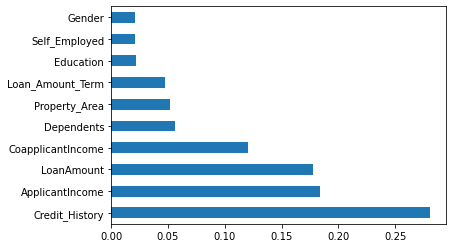

In [73]:
feat_importances = pd.Series(model1.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [181]:
#x1=data.drop(['Married','Gender','Self_Employed','Loan_Status','Loan_Amount_Term','Property_Area','Dependents','Education'],axis=1)

In [137]:
x1=data[['Credit_History','ApplicantIncome','LoanAmount','CoapplicantIncome']]

In [138]:
x1.head(20)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome
0,1.0,5849,146.412162,0.0
1,1.0,4583,128.000000,1508.0
2,1.0,3000,66.000000,0.0
3,1.0,2583,120.000000,2358.0
4,1.0,6000,141.000000,0.0
5,1.0,5417,267.000000,4196.0
6,1.0,2333,95.000000,1516.0
7,0.0,3036,158.000000,2504.0
8,1.0,4006,168.000000,1526.0
9,1.0,12841,349.000000,10968.0


In [97]:
y1=data['Loan_Status']

In [102]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est1 = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,7,None],
              'n_estimators':[100,200,300,400],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est1, rf_p_dist, 10, x1, y1)




In [103]:
rf_parameters,rf_ht_score

({'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 5,
  'max_features': 1,
  'min_samples_leaf': 1,
  'n_estimators': 400},
 0.809462915601023)

In [116]:
rdm2=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth= 3,max_features= 3,min_samples_leaf= 2,n_estimators=100)

In [117]:
rdm2.fit(x1,y1)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
rdm2_score=cross_val_score(rdm2,x1,y1,cv=10)

In [119]:
rdm2_score.mean()

0.8112109994711793

In [120]:
Test_data_pred=rdm2.predict(test_data)

In [121]:
Pred_test=pd.DataFrame(Test_data_pred)

In [122]:
dataset=pd.concat([sub_df['Loan_ID'],Pred_test],axis=1)

In [123]:
dataset.columns=['Loan_ID','Loan_Status',]

In [124]:
dict_test={1:"Y",0:'N'}

In [125]:
dataset['Loan_Status']=dataset['Loan_Status'].map(dict_test)

In [133]:
dataset.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [127]:
dataset.to_csv('D:\\PYTHON\\datasets\\Predict loan approval\\sample_submission.csv',index=False)

#Creating Model as pkl file

In [128]:
import pickle

In [130]:
pickle.dump(rdm2,open("Loan_Prediction.pkl",'wb'))